# Clasificador de Imágenes: Detección de Mascarillas

Este proyecto tiene como objetivo desarrollar un modelo de red neuronal convolucional capaz de clasificar imágenes de personas según usen o no mascarilla. Utilizaremos TensorFlow/Keras junto con técnicas de aumento de datos y transferencia de aprendizaje para mejorar el rendimiento.

In [1]:
# Importación de librerías necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


## Preparación del Dataset
Se utilizará un generador de imágenes para cargar y preprocesar el dataset. Se recomienda organizar los datos en carpetas separadas para cada clase: `with_mask` y `without_mask`.

In [3]:
# Definición de generadores de datos con aumento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Directorio de imágenes (debe tener subcarpetas 'with_mask' y 'without_mask')
data_dir = r'D:\UMG\QUINTO AÑO\INTELIGENCIA ARTIFICIAL\ProyectoFinal\dataset'

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


## Diseño del Modelo
Se utiliza MobileNetV2 como base preentrenada para aprovechar transferencia de aprendizaje. Se añaden capas densas para realizar la clasificación binaria (mascarilla vs. sin mascarilla).

In [4]:
# Cargar modelo base preentrenado
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar capas base

# Añadir capas superiores
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Entrenamiento del Modelo
Entrenamos el modelo con `EarlyStopping` para prevenir sobreajuste y `ModelCheckpoint` para guardar el mejor modelo.

In [5]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('mejor_modelo.h5', monitor='val_loss', save_best_only=True)

# Entrenar modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

c:\Users\javgu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 44/189 ━━━━━━━━━━━━━━━━━━━━ 1:58 816ms/step - accuracy: 0.7534 - loss: 0.5200

c:\Users\javgu\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.8847 - loss: 0.2994

189/189 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8851 - loss: 0.2987 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.9813 - loss: 0.0630

189/189 ━━━━━━━━━━━━━━━━━━━━ 139s 737ms/step - accuracy: 0.9813 - loss: 0.0630 - val_accuracy: 0.9748 - val_loss: 0.0773
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.9838 - loss: 0.0445

189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 747ms/step - accuracy: 0.9838 - loss: 0.0445 - val_accuracy: 0.9788 - val_loss: 0.0551
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 746ms/step - accuracy: 0.9881 - loss: 0.0363 - val_accuracy: 0.9788 - val_loss: 0.0565
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 138s 730ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9722 - val_loss: 0.0694
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.9895 - loss: 0.0322

189/189 ━━━━━━━━━━━━━━━━━━━━ 138s 730ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 746ms/step - accuracy: 0.9901 - loss: 0.0300 - val_accuracy: 0.9841 - val_loss: 0.0568
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 746ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9821 - val_loss: 0.0510
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 754ms/step - accuracy: 0.9879 - loss: 0.0287 - val_accuracy: 0.9788 - val_loss: 0.0652
Epoch 10/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 742ms/step - accuracy: 0.9850 - loss: 0.0350 - val_accuracy: 0.9821 - val_loss: 0.0578
Epoch 11/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 752ms/step - accuracy: 0.9922 - loss: 0.0222 - val_accuracy: 0.9854 - val_loss: 0.0478


## Evaluación del Modelo

Visualizamos la curva de precisión y pérdida para evaluar el rendimiento del modelo a lo largo del tiempo.

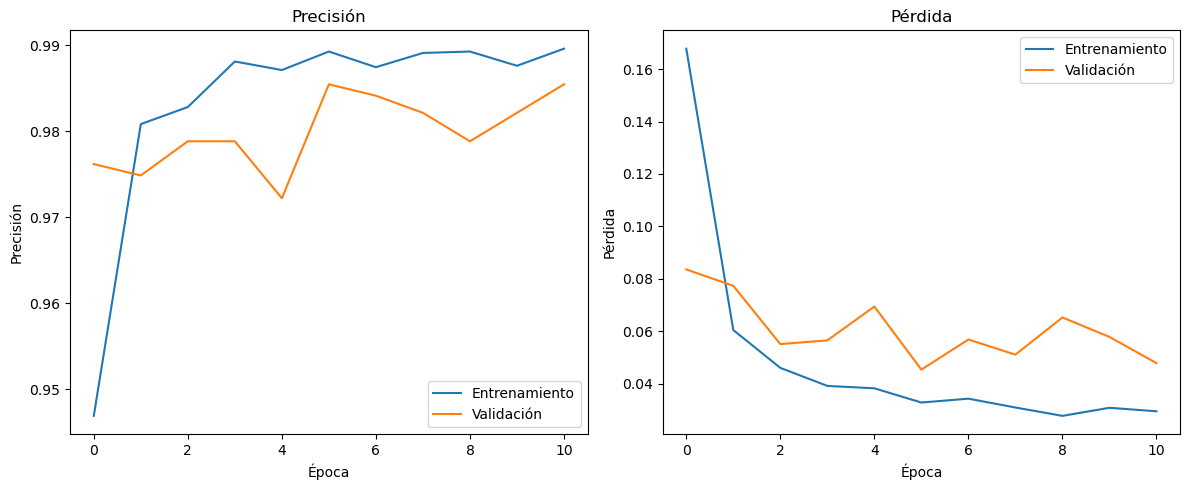

In [6]:
# Visualización del entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

## Guardar Modelo

In [8]:
# Guardar el modelo entrenado
model.save("modelo_mascarillas.keras")
print("Modelo guardado como modelo_mascarillas.keras")


Modelo guardado como modelo_mascarillas.keras


## Cargar imagen externa y predecir

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


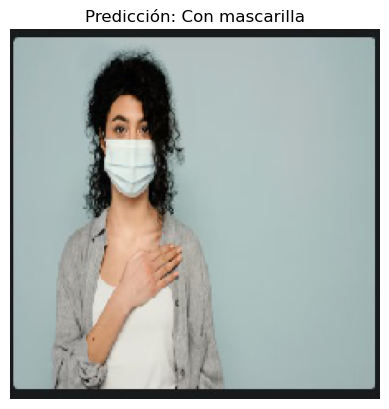

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar el modelo entrenado
model = load_model("modelo_mascarillas.keras")

# Ruta de la imagen a probar
ruta_imagen = r'D:\UMG\QUINTO AÑO\INTELIGENCIA ARTIFICIAL\ProyectoFinal\imagen_prueba.jpg'  # cambia esto por tu imagen

# Cargar y preprocesar imagen
img = image.load_img(ruta_imagen, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalización

# Predicción
prediccion = model.predict(img_array)

# Mostrar resultado
etiquetas = ['Con mascarilla', 'Sin mascarilla']
indice = int(prediccion[0][0] > 0.5)  # Asumiendo salida tipo sigmoid
plt.imshow(img)
plt.title(f"Predicción: {etiquetas[indice]}")
plt.axis('off')
plt.show()
